In [ ]:
# !git clone -b master https://github.com/StefanoNasini/Country-by-country-2022-2023-international-relationships
# !cd Country-by-country-2022-2023-international-relationships

Implement and realize the formula
$$w_{ij} = (1+\frac{GDP_j}{GDP_i})^{d_{ij}}$$

(previous version features an extra coefficient for friends and enemies) where 

$d_{i,j} = 1$ if i and j are neighbors. 

$d_{i,j}=\frac{\Delta_{max}-\Delta_{i,j}}{\Delta_{max}}$ otherwise

In [2]:
import json
import os
root = os.getcwd()
root = os.path.dirname(root)
import pandas as pd

In [3]:
rho = 1

covotes = pd.read_csv(os.path.join(root, "constructed_network", "covotes.csv"), index_col=0)
friends90_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "friends90_tri.csv"), index_col=0)
enemies90_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "enemies90_tri.csv"), index_col=0)

friends80_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "friends80_tri.csv"), index_col=0)
enemies80_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "enemies80_tri.csv"), index_col=0)
dij = pd.read_csv(os.path.join(root, "constructed_network", "distance_factor.csv"), index_col = 0)
UN_countries = friends90_tri.columns

In [4]:
wij = pd.DataFrame(columns=sorted(UN_countries), index=sorted(UN_countries))

In [5]:
with open(os.path.join(root, "raw_data", "GDP_data", "GDP_data.json"), 'r') as f:
    GDP = eval(f.read())

In [6]:
os.chdir(os.path.join(root, "src", "utils"))
from aka import tri2aka
os.chdir(os.path.join(root, "src"))

['Y AFGHANISTAN\n', 'A ALBANIA\n', 'Y ALGERIA\n', 'A ANDORRA\n', 'Y ANGOLA\n', 'Y ANTIGUA AND BARBUDA\n', 'Y ARGENTINA\n', 'A ARMENIA\n', 'N AUSTRALIA\n', 'N AUSTRIA\n']


In [7]:
# make sure every country in the UN have their GDP data


for c in covotes.columns:
    if c not in GDP.keys():
        print(c)
        print(tri2aka[c])

In [8]:
for tri1 in UN_countries:
    for tri2 in UN_countries:
        wij.loc[tri1, tri2] = (1+GDP[tri2]/GDP[tri1])**(dij.loc[tri1, tri2])
#         if enemies90_tri.loc[tri1, tri2] == True:
#             wij.loc[tri1, tri2] *= rho

In [9]:
# no missing values
wij.isna().sum().sum()

0

In [10]:
with open(os.path.join(root, 'constructed_network', 'w_data_real_double.txt'), 'w') as f:
    for i in range(len(UN_countries)):
        for j in range(len(UN_countries)):
            f.write(str((wij.iloc[i, j])))
            f.write(' ')
        f.write('\n')

In [11]:
# wij /= wij.min().min()

In [12]:
wij.to_csv(os.path.join(root, "constructed_network", "final_network", "weighted.csv"))

In [13]:
# truncate to unity
wij_unit = pd.DataFrame(index=UN_countries, columns=UN_countries, dtype=int)

In [14]:
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        wij_unit.iloc[i, j] = int(wij.iloc[i, j]+0.5)

In [15]:
with open(os.path.join(root, 'constructed_network', 'w_data_real.txt'), 'w') as f:
    for i in range(len(UN_countries)):
        for j in range(len(UN_countries)):
            f.write(str((wij_unit.iloc[i, j])))
            f.write(' ')
        f.write('\n')

In [52]:
# for 90 percent

import matplotlib.pyplot as plt
l = []
out_degree = [0]*len(UN_countries)
in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends90_tri.iloc[i, j] == True or enemies90_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            out_degree[i] += 1
            
        if friends90_tri.iloc[j, i] == True or enemies90_tri.iloc[j, i] == True:
            in_degree[i] += 1
            
l = []
w_out_degree = [0]*len(UN_countries)
w_in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends90_tri.iloc[i, j] == True or enemies90_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            w_out_degree[i] += wij.iloc[i, j]
            
        if friends90_tri.iloc[j, i] == True or enemies90_tri.iloc[j, i] == True:
            w_in_degree[i] += wij.iloc[i, j]
            
from math import log10
for i in range(len(UN_countries)):
    w_in_degree[i] = log10(1+w_in_degree[i])
    w_out_degree[i] = log10(1+w_out_degree[i])


In [53]:
plt.hist(in_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'in_degree90.pdf'), format="pdf")
plt.close()

plt.hist(out_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'out_degree90.pdf'), format="pdf")
plt.close()

import numpy as np

plt.hist(w_in_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_in_degree90.pdf'), format="pdf")
plt.close()

plt.hist(w_out_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_out_degree90.pdf'), format="pdf")
plt.close()

In [54]:
# for 80 percent

import matplotlib.pyplot as plt
l = []
out_degree = [0]*len(UN_countries)
in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends80_tri.iloc[i, j] == True or enemies80_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            out_degree[i] += 1
            
        if friends80_tri.iloc[j, i] == True or enemies80_tri.iloc[j, i] == True:
            in_degree[i] += 1
            
        
l = []
w_out_degree = [0]*len(UN_countries)
w_in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends80_tri.iloc[i, j] == True or enemies80_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            w_out_degree[i] += wij.iloc[i, j]
            
        if friends80_tri.iloc[j, i] == True or enemies80_tri.iloc[j, i] == True:
            w_in_degree[i] += wij.iloc[i, j]
            
from math import log10
for i in range(len(UN_countries)):
    w_in_degree[i] = log10(1+w_in_degree[i])
    w_out_degree[i] = log10(1+w_out_degree[i])


In [55]:
plt.hist(in_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'in_degree80.pdf'), format="pdf")
plt.close()

plt.hist(out_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'out_degree80.pdf'), format="pdf")
plt.close()


plt.hist(w_in_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_in_degree80.pdf'), format="pdf")
plt.close()

plt.hist(w_out_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_out_degree80.pdf'), format="pdf")
plt.close()

In [26]:
w_in_degree

[40.57446791855322,
 18.302219720191054,
 577.4177991399151,
 126.30528097186682,
 12.619852600701957,
 4.090253891990507,
 140.66376412871705,
 26.87517718898525,
 60.90624187888293,
 1.992323818558579,
 1666.81480974706,
 112.11658257287067,
 108.37640420945479,
 13.457301909418636,
 1.9901071164403275,
 208.12264891453404,
 8.263738319145448,
 1.99691679916945,
 21.463083173532063,
 33.76611452972806,
 99.52716402256402,
 2.9847483638752847,
 14.537842829319287,
 82.36578580544332,
 84.52916593609302,
 12070.49906504556,
 1.9798518765151745,
 1836.3799754612112,
 46.34991056333206,
 111.7628251649654,
 14.890847636521512,
 30.02432012743354,
 5.057169245928149,
 3.7903349279423937,
 9.455145575375402,
 3.6103775551396073,
 17.42024860825335,
 3216.5959223445243,
 599.0217508412879,
 10.545829286073257,
 3.004413622195321,
 142.87886255389367,
 45.927241347178764,
 76.83298524827501,
 402.01666684478766,
 160.87983949157191,
 107.00879183297299,
 3.031513923411201,
 10.47430464504458

(array([77., 31., 15., 18., 11.,  9.,  5.,  5.,  4.,  0.,  1.,  0.,  3.,
         1.,  1.,  0.,  0.,  0.,  2.,  1.]),
 array([  1. ,   9.6,  18.2,  26.8,  35.4,  44. ,  52.6,  61.2,  69.8,
         78.4,  87. ,  95.6, 104.2, 112.8, 121.4, 130. , 138.6, 147.2,
        155.8, 164.4, 173. ]),
 <BarContainer object of 20 artists>)

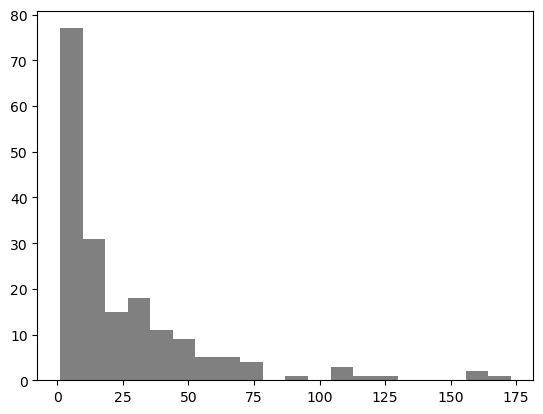

In [71]:
# histogram for in-degree
plt.hist(in_degree, bins=20, color='grey')
# plt.title("The histogram of in-degrees for all country")

(array([13., 22., 26., 33., 21.,  5., 17.,  5.,  3.,  5.,  4.,  3.,  6.,
         3.,  5.,  5.,  4.,  1.,  1.,  2.]),
 array([ 4.  ,  7.65, 11.3 , 14.95, 18.6 , 22.25, 25.9 , 29.55, 33.2 ,
        36.85, 40.5 , 44.15, 47.8 , 51.45, 55.1 , 58.75, 62.4 , 66.05,
        69.7 , 73.35, 77.  ]),
 <BarContainer object of 20 artists>)

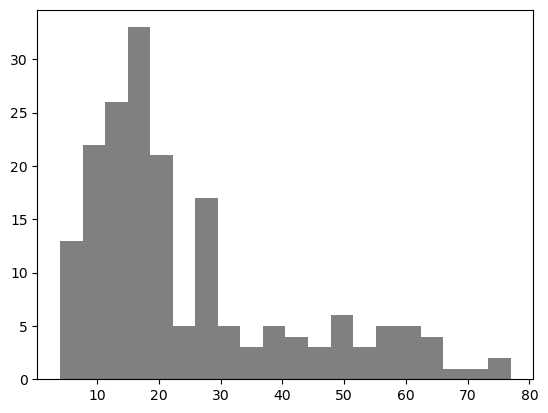

In [70]:
# histogram for out-degree
plt.hist(out_degree, bins=20, color='grey')
# plt.title("The histogram of out-degrees for all country")